# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio 

&nbsp;

<span style="color:red"> 
    
A instituição financeira XY deseja uma análise profunda do perfil dos seus clientes atuais e um bom modelo de previsão de renda para novos clientes que ingressarem na instituição.
   
Para termos esses resultados, primeiro vamos fazer análises dos dados que temos disponíveis no banco de dados (que serão analisados detalhadamente na próxima etapa) e depois iremos criar o sistema de modelagem.
    
Nosso objetivo principal nesse projeto será entender melhor quem é o consumidor final da instituição financeira e, por consequência, atender melhor os clientes baseado em seu perfil e renda.
    
</span>


## Etapa 2 Crisp-DM: Entendimento dos dados

&nbsp;

<span style="color:red">

Para começar o projeto, vamos importar os pacotes e o arquivo do banco de dados.
    
</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

### Dicionário de dados

&nbsp;

<span style="color:red"> 

Agora vamos ver as informações que temos e seu tipo.
    
<span/>
    
&nbsp;

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data em que a informação foi adicionada no banco de dados    | object       |
| id_cliente              |  ID único de cada cliente que o banco atribuiu a ele    | int64        |
| sexo                    |  Gênero do cliente    | object       |
| posse_de_veiculo        |  Se possui ou não veículo    | bool         |
| posse_de_imovel         |  Se possui ou não imóvel    | bool         |
| qtd_filhos              |  Quantidade de filhos    | int64        |
| tipo_renda              |  Qual a fonte da sua renda    | object       |
| educacao                |  Nível de escolaridade    | object       |
| estado_civil            |  Estado civil do cliente    | object       |
| tipo_residencia         |  Qual o tipo de residência    | object       |
| idade                   |  Idade do cliente    | int64        |
| tempo_emprego           |  Tempo no emprego atual    | float64      |
| qt_pessoas_residencia   |  Quantas pessoas moram com o cliente    | float64      |
| renda                   |  Sua renda    | float64      |

In [3]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada e Bivariada

<span style="color:red">

Vamos fazer agora uma análise mais detalhada dos dados usando o Profile Report.

</span>



In [4]:
#prof = ProfileReport(renda)
#prof

In [5]:
#prof.to_file('./output/renda_analisys.html')

<span style="color:red">

Com essa análise, percebemos que o nosso banco de dados está bem robusto. Os missings estão concentrados na variável 'tempo_emprego', o que significa que o cliente não está empregado. E um alto número de zeros pode ser encontrado em 'qtd_filhos' que simplesmente quer dizer que o cliente não tem filhos.
    
Alguns problemas encontrados que vamos resolver banco de dados são:
 - Excluir linhas duplicadas (se houver);
 - Excluir as variáveis 'Unnamed: 0', 'data_ref' e 'id_cliente' que não interferem na análise;
 - Podemos notar que a variável 'tipo_residencia' está com 90% dos valores 'Casa', então vamos excluir também da análise;
 - As variáveis 'qtd_filhos' e 'qt_pessoas_residencia' são altamente relacionadas, e por isso, vamos manter apenas 'qt_pessoas_residencia';
 - Transformar a variável 'sexo' em bool, sendo M equivalente a 1 e F a 0;
 - Transformar 'qt_pessoas_residencia' em int;	
 - Transformar os NaN values de 'tempo_emprego' em 0.

</span>

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?

<span style="color:red">

Seguindo as observações do passo anterior, vamos preparar os dados para deixar o DataFrame o mais robusto e funcional possível.
    
</span>

In [6]:
# Exluindo linhas duplicadas

renda.drop_duplicates(inplace = True)

# Excluindo colunas

renda.drop(columns = ['Unnamed: 0', 'data_ref', 'id_cliente', 'tipo_residencia', 'qtd_filhos'], inplace = True) 

# Convertendo 'sexo' em bool

sexo = {'M' : 1, 'F' : 0}

renda['sexo'] = renda['sexo'].map(sexo).astype(bool)

# Transformando 'qt_pessoas_residencia' em int

renda['qt_pessoas_residencia'] = renda['qt_pessoas_residencia'].astype(int)

# Transformando NaN values em 0

renda.fillna(0, inplace = True)

In [7]:
# Checando o DataFrame com alterações

renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  bool   
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   tipo_renda             15000 non-null  object 
 4   educacao               15000 non-null  object 
 5   estado_civil           15000 non-null  object 
 6   idade                  15000 non-null  int64  
 7   tempo_emprego          15000 non-null  float64
 8   qt_pessoas_residencia  15000 non-null  int32  
 9   renda                  15000 non-null  float64
dtypes: bool(3), float64(2), int32(1), int64(1), object(3)
memory usage: 805.8+ KB


<span style="color:red">

Podemos perceber que agora só temos as variáveis necessárias para a análise e não temos nenhum dado faltante. Além disso, todas as variáveis estão no tipo correto para a análise.
    
Agora vamos analisar se existem outliers na variável resposta 'renda'.
    
</span>

In [8]:
renda['renda'].describe()

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

In [9]:
renda['renda'].quantile(0.95)

16885.96399999999

In [10]:
renda = renda[(renda['renda'] < 15000)]
renda.shape

(14046, 10)

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">

Vamos desenvolver um modelo de regressão para prever a renda. Começaremos dividindo o nosso DF em treino e teste e depois criaremos o modelo.
    
</span>

In [11]:
# Dividindo o DF em treino e teste

train, test = train_test_split (renda, train_size = 0.75)

### Rodando o modelo


In [12]:
# Criando o modelo de regressão

reg_renda = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + educacao + estado_civil + idade + tempo_emprego + qt_pessoas_residencia', data = train).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:58:31   Log-Likelihood:                -98018.
No. Observations:               10534   AIC:                         1.961e+05
Df Residuals:                   10515   BIC:                         1.962e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1175.4822    313.120      3.754      0.000     561.708    1789.257
sexo[T.True]                     2601.7631     63.191     41.173      0.000    2477.896    2725.630
posse_de_veiculo[T.True]           75.4389     58.399      1.292      0.196     -39.034     189.911
posse_de_imovel[T.True]           277.1181     56.361      4.917      0.000     166.640     387.596
tipo_renda[T.Bolsista]            603.6092    944.051      0.639      0.523   -1246.909    2454.128
tipo_renda[T.Empresário]          608.7854     65.693      9.267      0.000     480.014     737.557
tipo_renda[T.Pensionista]         920.6825    104.334      8.824      0.000     716.168    1125.197
tipo_renda[T.Servidor público]    390.2879     99.601      3.919      0.000     195.051     585.525
educacao[T.Pós graduação]        -556.2350    646.607     -0.860      0.390   -1823.708     711.238
educacao[T.Secundário]           -310.5837    250.093     -1.242      0.214    -800.813     179.646
educacao[T.Superior completo]      89.5007    252.372      0.355      0.723    -405.197     584.198
educacao[T.Superior incompleto]  -492.7249    282.146     -1.746      0.081   -1045.785      60.335
estado_civil[T.Separado]           -0.2878    119.635     -0.002      0.998    -234.796     234.220
estado_civil[T.Solteiro]          -84.0740     95.818     -0.877      0.380    -271.896     103.748
estado_civil[T.União]             -23.8310    102.418     -0.233      0.816    -224.589     176.927
estado_civil[T.Viúvo]             208.7956    131.187      1.592      0.112     -48.357     465.948
idade                              13.3394      3.345      3.988      0.000       6.783      19.896
tempo_emprego                     188.6230      4.950     38.108      0.000     178.921     198.325
qt_pessoas_residencia              84.5235     37.761      2.238      0.025      10.504     158.543
==============================================================================
Omnibus:                     1696.908   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2825.055
Skew:                           1.077   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Vamos retirando do modelo as variáveis que não interferem no objetivo

reg_renda = smf.ols('renda ~ sexo + posse_de_imovel + idade + tempo_emprego + qt_pessoas_residencia', data = train).fit()
reg_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     610.0
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:59:47   Log-Likelihood:                -98125.
No. Observations:               10534   AIC:                         1.963e+05
Df Residuals:                   10528   BIC:                         1.963e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1015.8491    157.291      6.458      0.000     707.529    1324.169
sexo[T.True]             2524.7525     59.780     42.234      0.000    2407.572    2641.933
posse_de_imovel[T.True]   286.5442     56.769      5.048      0.000     175.266     397.822
idade                      24.7989      2.543      9.751      0.000      19.814      29.784
tempo_emprego             169.7550      4.280     39.659      0.000     161.365     178.145
qt_pessoas_residencia      73.4250     30.651      2.396      0.017      13.344     133.506
==============================================================================
Omnibus:                     1698.811   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2802.264
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                       4.293   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

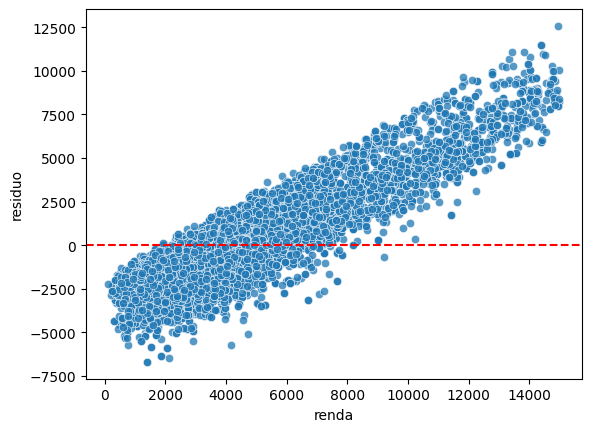

In [17]:
# Estudando o resíduo

renda['residuo'] = reg_renda.resid

sns.scatterplot(x = 'renda', y = 'residuo', data = renda, alpha = .75)
plt.axhline(y = 0, color = 'r', linestyle = '--')

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

NameError: name 'df' is not defined

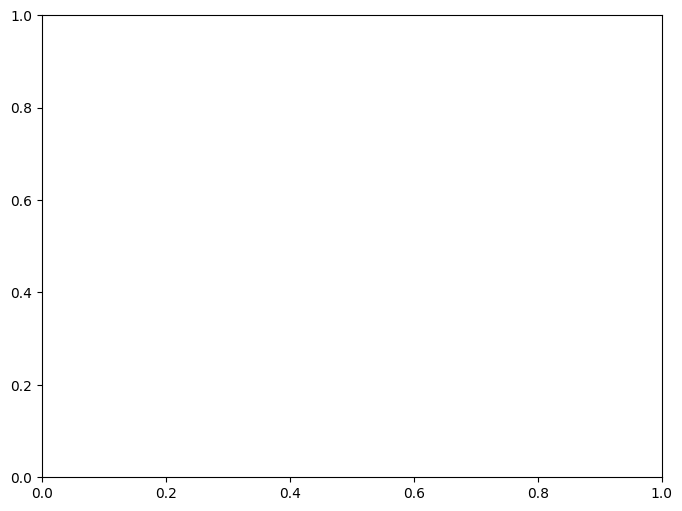

In [15]:
#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(8,6))
#criando o gráfico de barras
sns.pairplot(x=df.index, y=df['quantidade'], ax=ax, data=df,     
            palette='RdPu')
#adicionando título
ax.set_title("quantidade x ano", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Anos', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax.set_ylabel('Quantidades', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#otimizar espaço da figure
fig.tight_layout();